### Задание 1
Импортируйте библиотеки pandas и numpy.

In [55]:
import pandas as pd

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [56]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston.data
X = pd.DataFrame(data, columns=boston.feature_names)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [57]:
y = pd.DataFrame(boston.target, columns=['price'])
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так,
чтобы размер тестовой выборки составлял 30% от всех данных,
при этом аргумент random_state должен быть равен 42.

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки), и сделайте предсказание на тестовых.

In [60]:
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred1.flatten()},
                          columns=['y_test', 'y_pred'])
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


Вычислите R2 полученных предсказаний с помощью r2_score из модуля sklearn.metrics.

In [61]:
from sklearn.metrics import r2_score
R2_linear = r2_score(y_test['price'], y_pred1.flatten())
R2_linear

0.7112260057484974

### Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.

In [62]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

Сделайте аргумент n_estimators равным 1000,
max_depth должен быть равен 12 и random_state сделайте равным 42.

In [63]:
model.n_estimators = 1000
model.random_state = 42
model.max_depth = 12

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [64]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [65]:
y_pred2 = model.predict(X_test)
check_test = pd.DataFrame({'y_test': y_test['price'],
                           'y_pred': y_pred2.flatten()},
                          columns=['y_test', 'y_pred'])
check_test.head(10)

,y_test,y_pred
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521
76,20.0,21.832284
316,17.8,19.895747
140,14.0,14.754118
471,19.6,21.240835
500,16.8,20.898658


In [66]:
R2_forest = r2_score(y_test['price'], y_pred2.flatten())
R2_forest

0.87472606157312

Напишите в комментариях к коду, какая модель в данном случае работает лучше.

**лучше работает модель RandomForestRegressor**

### *Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.

[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]
Feature: 0, Score: 0.03168
Feature: 1, Score: 0.00154
Feature: 2, Score: 0.00714
Feature: 3, Score: 0.00124
Feature: 4, Score: 0.01427
Feature: 5, Score: 0.40268
Feature: 6, Score: 0.01430
Feature: 7, Score: 0.06397
Feature: 8, Score: 0.00528
Feature: 9, Score: 0.01152
Feature: 10, Score: 0.01808
Feature: 11, Score: 0.01245
Feature: 12, Score: 0.41585


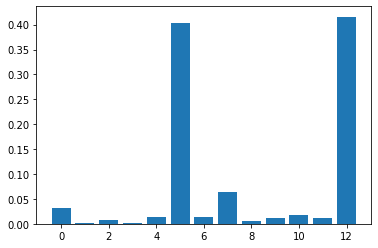

In [68]:
from matplotlib import pyplot
importance = model.feature_importances_
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

два признака, которые показывают наибольшую важность:

RM average number of rooms per dwelling

LSTAT % lower status of the population